In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="font-family:verdana;"> <center> Pistachio Classification &amp; Fine Tuning With EfficientNet  🥜</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:30px;"> “In the end we retain from our studies only that which we practically apply.” – Johann Wolfgang Von Goethe</center></p>


![pistachio](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Pistachio/Pistachio.jpg)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
About Pistachio


</p>
</div>


<span style="font-family:cursive;"> The pistachio (/pɪˈstɑːʃiˌoʊ, -ˈstæ-/,[2] Pistacia vera), a member of the cashew family, is a small tree originating from Central Asia and the Middle East. The tree produces seeds that are widely consumed as food. </span>

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Please vote up if you like this note book 🙏
</div>

# Table of Contents

1 [Introduction](#1)

2 [Importing Libraries](#2)

   2.1 [Setting Path](#2.1)

2.2 [Importing Data](#2.2)

3 [Data Distribution of whole Data](#3)

4 [Siplting the Data into Train test and Val](#4)

  4.1 [ Distributation of Train Data](#4.1)

  4.2 [Distributation of val Data](#4.2)
5 [Displaying Images](#5)

6 [Image Data Generator](#6)

7 [Efficeint Net](#7)

8 [Fine Tunning](#8)

9 [Call Backs](#9)

10 [Plotting the result](#10)

11 [Model Evaluation](#11)

12 [Predition Comparsion](#12)

12 [Confusion Matrix](#13)



 <h1  id="1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px">  Inroduction </h1>
           
************




<span style="font-family:cursive; font-size:30px;"> In this notebook, we will learn how to classify images of Pistachio by making a fine tuning to a pre-trained network. </span>




<span style="font-family:cursive;font-size:15px;"> additionally what we will learn. </span>

<span style="font-family:cursive;font-size:15px;"> Load the data of images. </span>


<span style="font-family:cursive;font-size:15px;"> Visulaise the Data distribution of all data </span>

<span style="font-family:cursive;font-size:15px;">Visulaise the Data distribution of traina and test data </span>

<span style="font-family:cursive;font-size:15px;"> Visualizing some of the images </span>

<span style="font-family:cursive;font-size:15px;"> Efficient NetB7 </span>

<span style="font-family:cursive;font-size:15px;">Fine Tuning </span>

<span style="font-family:cursive;font-size:15px;"> Setting up callbacks </span>

<span style="font-family:cursive;font-size:15px;"> Graph the training loss and validation loss </span>

<span style="font-family:cursive;font-size:15px;">Classification Report </span>

<span style="font-family:cursive;font-size:15px;"> Prediction Comparison </span>

<span style="font-family:cursive;font-size:15px;"> Confusion Matrix </span>



        


 <h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  Installing some of libraries</h4>

In [1]:
!pip install split-folders

 <h1  id="2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2 Importing Libraries </h1>





<span style="font-family:cursive; font-size:30px;"> We are Importing Libraries. </span>



<span style="font-family:cursive; font-size:15px;">Libraries which need for. </span>


<span style="font-family:cursive; font-size:15px;"> Image Processing. </span>

<span style="font-family:cursive; font-size:15px;"> Data visualization. </span>

<span style="font-family:cursive; font-size:15px;"> Model Loading.. </span>


 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 


<h1  id="2.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2.1 Setting Path </h1>


<h1  id="2.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  Importing Data </h1>

In [3]:
data_dir = "../input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/"
data_dir =pathlib.Path(data_dir)

In [4]:


Total_Images = glob.glob('../input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/*/*.jpg')
print("Total number of images: ", len(Total_Images))

Total_Images = pd.Series(Total_Images)

Total number of images:  2148


In [5]:
total_df = pd.DataFrame()

# generate Filename field
total_df['Filename'] = Total_Images.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
total_df['ClassId'] = Total_Images.map(lambda img_name: img_name.split("/")[-2])

total_df.head()

Filename            ClassId
0  kirmizi 1109.jpg  Kirmizi_Pistachio
1  kirmizi (10).jpg  Kirmizi_Pistachio
2    kirmizi 97.jpg  Kirmizi_Pistachio
3   kirmizi 475.jpg  Kirmizi_Pistachio
4    kirmizi 29.jpg  Kirmizi_Pistachio

In [6]:
class_id_distributionTotal = total_df['ClassId'].value_counts()
class_id_distributionTotal.head(10)

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: ClassId, dtype: int64




<h1  id="3" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 3 Total Distribution of Data </h1>



<span style="font-family:cursive; font-size:15px;">Below charts shows the perentage of data of two different classes.. </span>

<span style="font-family:cursive; font-size:15px;">"Kirmizi_Pistachio " class contains 57.4% from data. </span>

<span style="font-family:cursive; font-size:15px;"> "Siirt_Pistachio" class contains 42.6% from data. </span>

<span style="font-family:cursive; font-size:15px;"> Clearly the data is not equaly distributed.. </span>





In [7]:
fig = go.Figure(go.Bar(
            x=  class_id_distributionTotal.values,
            y=class_id_distributionTotal.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [8]:
fig=px.pie(class_id_distributionTotal.head(10),values= 'ClassId', names=total_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Pistachio',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()



<h1  id="4" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 4 Siplitting data into Train, Test, Val data set </h1>


<span style="font-family:cursive; font-size:15px;">using split folder so we can divide the data in to three parts. </span>


<span style="font-family:cursive; font-size:15px;"> Training Set contain 80% of data </span>

<span style="font-family:cursive; font-size:15px;">Test Set contain 10% of data </span>

<span style="font-family:cursive; font-size:15px;">Validation Set contain 10% of data </span>


 
 

In [9]:

splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 2148 files [00:11, 194.41 files/s]




<h1   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px"> setting Path of the subfolder </h1>

In [10]:

train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)


In [11]:
train_image1 = glob.glob('./output/train/*/*.jpg')
Total_TrainImages = train_image1 
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpg')
Total_TestImages = test_image1 
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpg')

Total_ValImages = Val_image1 
print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  1717
Total number of test images:  217
Total number of val images:  214



<span style="font-family:cursive; font-size:30px;">Total Amount of Images in Each Sub-folder </span>


<span style="font-family:cursive; font-size:15px;">Total number of training Images 1717 </span>

<span style="font-family:cursive; font-size:15px;">Total number of test Images 217 </span>

<span style="font-family:cursive; font-size:15px;">Total number of val Images 214 </span>


<span style="font-family:cursive; font-size:30px;">Below chart shows the perentage of data of three sipliited data set.. </span>


<span style="font-family:cursive; font-size:15px;">"Trainng Set"  contains 79.1% from data.</span>

<span style="font-family:cursive; font-size:15px;">"Test Set"  contains 10.1% from data.FOr writing. </span>

<span style="font-family:cursive; font-size:15px;"> "Val Set"  contains 10% from data. </span>







In [12]:
random_x = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
names = ['Train_Data', 'Test_Data', 'Val_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='Pistachio',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [13]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

Filename          ClassId
0  siirt 517.jpg  Siirt_Pistachio
1  siirt 434.jpg  Siirt_Pistachio
2  siirt 545.jpg  Siirt_Pistachio
3  siirt 606.jpg  Siirt_Pistachio
4   siirt 42.jpg  Siirt_Pistachio

In [14]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

Kirmizi_Pistachio    985
Siirt_Pistachio      732
Name: ClassId, dtype: int64


<h1  id="4.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> Distribuation of Train Data</h1>


<span style="font-family:cursive; font-size:30px;">Below there are Two Charts of Training Data Set.. </span>

<span style="font-family:cursive; font-size:15px;">Bar Chart. </span>

<span style="font-family:cursive; font-size:15px;">Pie Chart. </span>

<span style="font-family:cursive; font-size:15px;">The data is not equally dsitributed.. </span>









In [15]:


fig = go.Figure(go.Bar(
            x= class_id_distribution_Train.values,
            y=class_id_distribution_Train.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [16]:
fig=px.pie(class_id_distribution_Train.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='pistachio',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

<h1  id="4.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 4.2 Distribution of Test Data </h1>

<span style="font-family:cursive; font-size:15px;">Below there are Two Charts of Test Data Set </span>

<span style="font-family:cursive; font-size:15px;">Bar Chart </span>

<span style="font-family:cursive; font-size:15px;">Pie Chart. </span>

<span style="font-family:cursive; font-size:15px;">
The data is not equally dsitributed. </span>




In [17]:
test_image_names = pd.Series(Total_TestImages)
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: img_name.split("/")[-2])

test_df.head()

Filename          ClassId
0  siirt 274.jpg  Siirt_Pistachio
1  siirt 135.jpg  Siirt_Pistachio
2  siirt 788.jpg  Siirt_Pistachio
3  siirt 482.jpg  Siirt_Pistachio
4   siirt 94.jpg  Siirt_Pistachio

In [18]:
class_id_distribution_test = test_df['ClassId'].value_counts()
class_id_distribution_test.head(10)

Kirmizi_Pistachio    124
Siirt_Pistachio       93
Name: ClassId, dtype: int64

In [19]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_test.values,
            y=class_id_distribution_test.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Test Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [20]:
fig=px.pie(class_id_distribution_test.head(10),values= 'ClassId', names=test_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Validation Data',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()



<h1  id="5" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 5 Dislaying Images </h1>

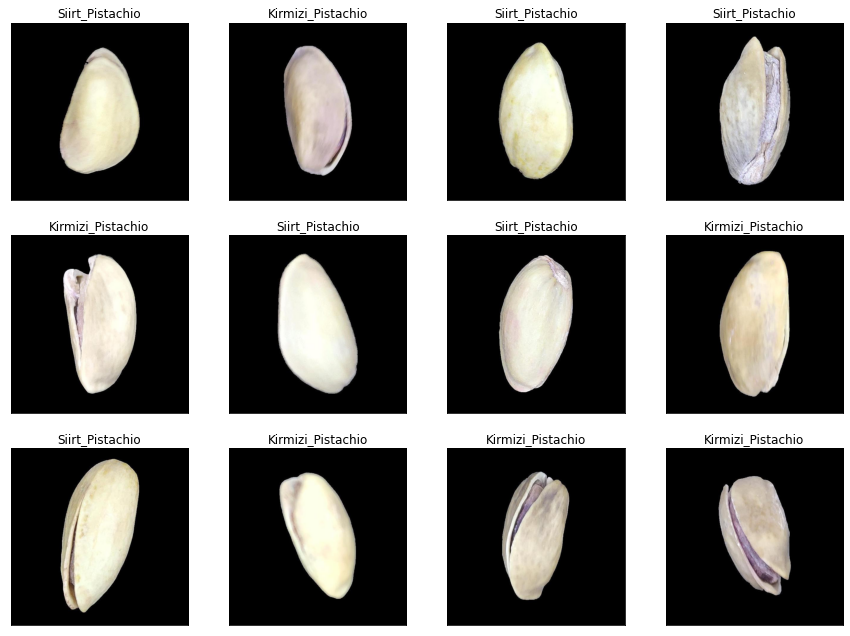

In [21]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

<h1  id="6" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 6 Image Data Generator </h1>

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')


Found 1717 images belonging to 2 classes.
Found 217 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


<h1  id="7" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 7 Efficent Net </h1>

<span style="font-family:cursive; font-size:25px;"> "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks. </span>

<span style="font-family:cursive; font-size:15px;">this paper, they systematically
study model scaling and identify that
carefully balancing network depth, width, and resolution
can lead to better performance </span>

<span style="font-family:cursive; font-size:15px;">The Most common way to scale up the netwok was to scale the depth of the network </span>

<span style="font-family:cursive; font-size:15px;">For Example the ResNet 18 was scaled upto ResNet 150 but with only one Dimesnion. </span>

<span style="font-family:cursive; font-size:15px;">They dont develop a new Network but they devlop the intitution that in order to achive more accuracy the network should be sclaed uniformly in all three Dimensions </span>


<span style="font-family:cursive; font-size:15px;">They use Mobile network  as a base line model and then develop Efficient Net B to  Efficient Net b7  by using Neural Netwrok archetecture Search</span>

<span style="font-family:cursive; font-size:15px;">The detailed video analysis can be seen on here </span>

[link](https://www.youtube.com/channel/UCSAw-QDHdXjrAMpg7-TELVA)


In [23]:
from tensorflow.keras.applications import EfficientNetB0

model = EfficientNetB0(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

16719872/16705208 [==============================] - 0s 0us/step


<h1  id="8" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 8 Fine Tuning </h1>

<span style="font-family:cursive; font-size:15px;"> Fine Tuning not only replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the backpropagation. </span>

<span style="font-family:cursive; font-size:15px;"> It is possible to tune the all layers or you can freesze the early layers of convent. </span>

<span style="font-family:cursive; font-size:15px;"> The conecpt is that since the early layers detect the edges colour or you can say early features and last layers catch the specific  deatails of the images. </span>


<span style="font-family:cursive; font-size:15px;"> More Details can be found here. </span>


[link](https://cs231n.github.io/transfer-learning/)



In [24]:
model.trainable = True

In [25]:
for layer in model.layers[:-15]:
    layer.trainable=False

In [26]:
def print_layer_trainable():
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [27]:
print_layer_trainable()

False:	input_1
False:	rescaling
False:	normalization
False:	stem_conv_pad
False:	stem_conv
False:	stem_bn
False:	stem_activation
False:	block1a_dwconv
False:	block1a_bn
False:	block1a_activation
False:	block1a_se_squeeze
False:	block1a_se_reshape
False:	block1a_se_reduce
False:	block1a_se_expand
False:	block1a_se_excite
False:	block1a_project_conv
False:	block1a_project_bn
False:	block2a_expand_conv
False:	block2a_expand_bn
False:	block2a_expand_activation
False:	block2a_dwconv_pad
False:	block2a_dwconv
False:	block2a_bn
False:	block2a_activation
False:	block2a_se_squeeze
False:	block2a_se_reshape
False:	block2a_se_reduce
False:	block2a_se_expand
False:	block2a_se_excite
False:	block2a_project_conv
False:	block2a_project_bn
False:	block2b_expand_conv
False:	block2b_expand_bn
False:	block2b_expand_activation
False:	block2b_dwconv
False:	block2b_bn
False:	block2b_activation
False:	block2b_se_squeeze
False:	block2b_se_reshape
False:	block2b_se_reduce
False:	block2b_se_expand
False:	block2

In [29]:
from keras.layers import  Dropout
x = Flatten()(model.output)
x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")

In [30]:
print_layer_trainable()

False:	input_1
False:	rescaling
False:	normalization
False:	stem_conv_pad
False:	stem_conv
False:	stem_bn
False:	stem_activation
False:	block1a_dwconv
False:	block1a_bn
False:	block1a_activation
False:	block1a_se_squeeze
False:	block1a_se_reshape
False:	block1a_se_reduce
False:	block1a_se_expand
False:	block1a_se_excite
False:	block1a_project_conv
False:	block1a_project_bn
False:	block2a_expand_conv
False:	block2a_expand_bn
False:	block2a_expand_activation
False:	block2a_dwconv_pad
False:	block2a_dwconv
False:	block2a_bn
False:	block2a_activation
False:	block2a_se_squeeze
False:	block2a_se_reshape
False:	block2a_se_reduce
False:	block2a_se_expand
False:	block2a_se_excite
False:	block2a_project_conv
False:	block2a_project_bn
False:	block2b_expand_conv
False:	block2b_expand_bn
False:	block2b_expand_activation
False:	block2b_dwconv
False:	block2b_bn
False:	block2b_activation
False:	block2b_se_squeeze
False:	block2b_se_reshape
False:	block2b_se_reduce
False:	block2b_se_expand
False:	block2

**Visual Respresntation of Model**

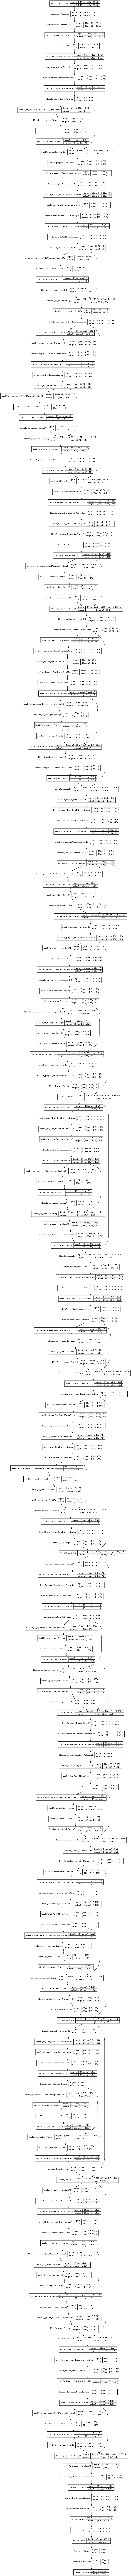

In [31]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 3.7 MB/s eta 0:00:00a 0:00:01


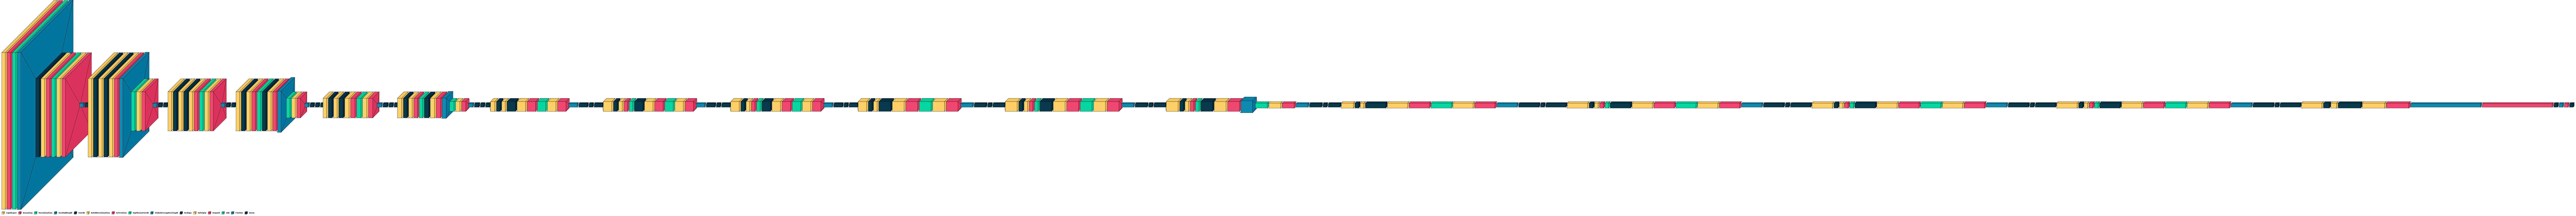

In [32]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 


<h1  id="8" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 9  Call Backs  </h1>
           
 

<span style="font-family:cursive; font-size:15px;">
A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). </span>          


In [34]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [36]:
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max',save_best_only=True )

<h5   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">  Train The model </h5>

In [37]:
H = model.fit_generator(train_generator,validation_data=val_generator,epochs=50,verbose=1,callbacks=[mc,es])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
54/54 [==============================] - 42s 545ms/step - loss: 0.6491 - accuracy: 0.5690 - val_loss: 0.4809 - val_accuracy: 0.5748


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/50
54/54 [==============================] - 28s 515ms/step - loss: 0.5908 - accuracy: 0.5970 - val_loss: 0.4633 - val_accuracy: 0.9112
Epoch 3/50
54/54 [==============================] - 28s 520ms/step - loss: 0.5866 - accuracy: 0.6098 - val_loss: 0.4130 - val_accuracy: 0.9720
Epoch 4/50
54/54 [==============================] - 27s 505ms/step - loss: 0.5781 - accuracy: 0.6424 - val_loss: 0.4242 - val_accuracy: 0.9579
Epoch 5/50
54/54 [==============================] - 28s 519ms/step - loss: 0.5731 - accuracy: 0.6377 - val_loss: 0.4714 - val_accuracy: 0.8925
Epoch 6/50
54/54 [==============================] - 28s 521ms/step - loss: 0.5710 - accuracy: 0.6313 - val_loss: 0.6553 - val_accuracy: 0.5047
Epoch 7/50
54/54 [==============================] - 28s 521ms/step - loss: 0.5608 - accuracy: 0.6401 - val_loss: 0.5079 - val_accuracy: 0.7804
Epoch 8/50
54/54 [==============================] - 27s 506ms/step - loss: 0.5693 - accuracy: 0.6407 - val_loss: 0.4596 - val_accuracy: 0.8785

<h1  id="10" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px"> 10 Plotting the Loss and Accuracy </h1>

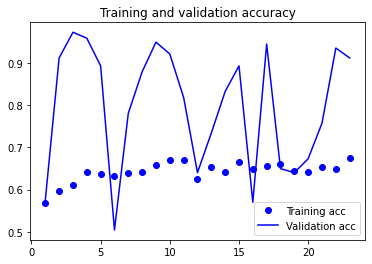

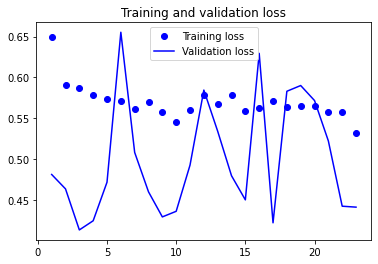

In [38]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']



epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1  id="11" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 11  Model Evaluation</h1>

In [39]:
 test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

7/7 [==============================] - 2s 246ms/step - loss: 0.4363 - accuracy: 0.9171
Loss: 43.626
Accuracy: 91.705


<h2  id="11.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  11.1 Classifiaction Report</h2>

In [40]:
from sklearn.metrics import classification_report

In [41]:
y_val = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)


In [42]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       124
           1       0.00      0.00      0.00        93

    accuracy                           0.57       217
   macro avg       0.29      0.50      0.36       217
weighted avg       0.33      0.57      0.42       217



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [44]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [45]:
filenames = test_generator.filenames

In [46]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename             actual          predicted  \
0  Kirmizi_Pistachio/kirmizi (20).jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
1  Kirmizi_Pistachio/kirmizi (21).jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
2  Kirmizi_Pistachio/kirmizi (27).jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
3  Kirmizi_Pistachio/kirmizi (31).jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
4  Kirmizi_Pistachio/kirmizi (35).jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
5   Kirmizi_Pistachio/kirmizi (5).jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
6     Kirmizi_Pistachio/kirmizi 1.jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
7  Kirmizi_Pistachio/kirmizi 1002.jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
8  Kirmizi_Pistachio/kirmizi 1021.jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   
9  Kirmizi_Pistachio/kirmizi 1029.jpg  Kirmizi_Pistachio  Kirmizi_Pistachio   

   Same  
0  True  
1  True  
2  True  
3  True  
4  True  
5  True  
6  True  
7  True  
8  True  
9  True

In [47]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

<h1  id="12" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px"> 12 Prediction Comparison </h1>

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"../input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')


<h1  id="12.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px"> 12.1 Correctly Classified</h1>

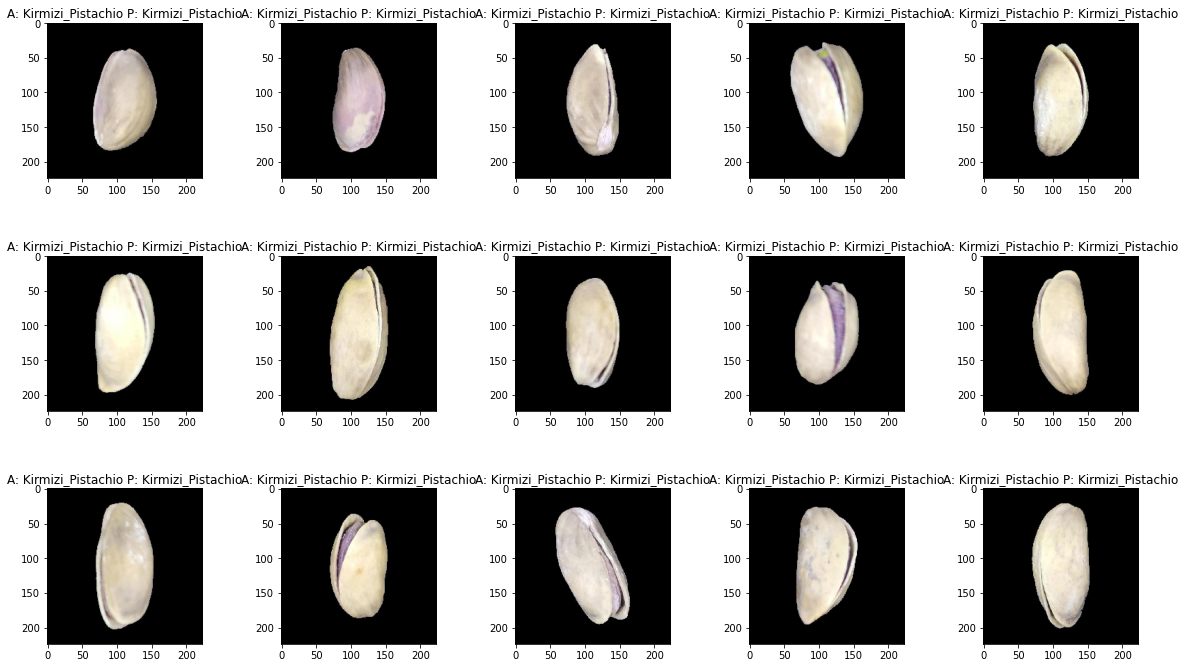

In [49]:
display_images(val_df[val_df['Same']==True])

<h1  id="12.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px"> 12.2 Miss Classified</h1>

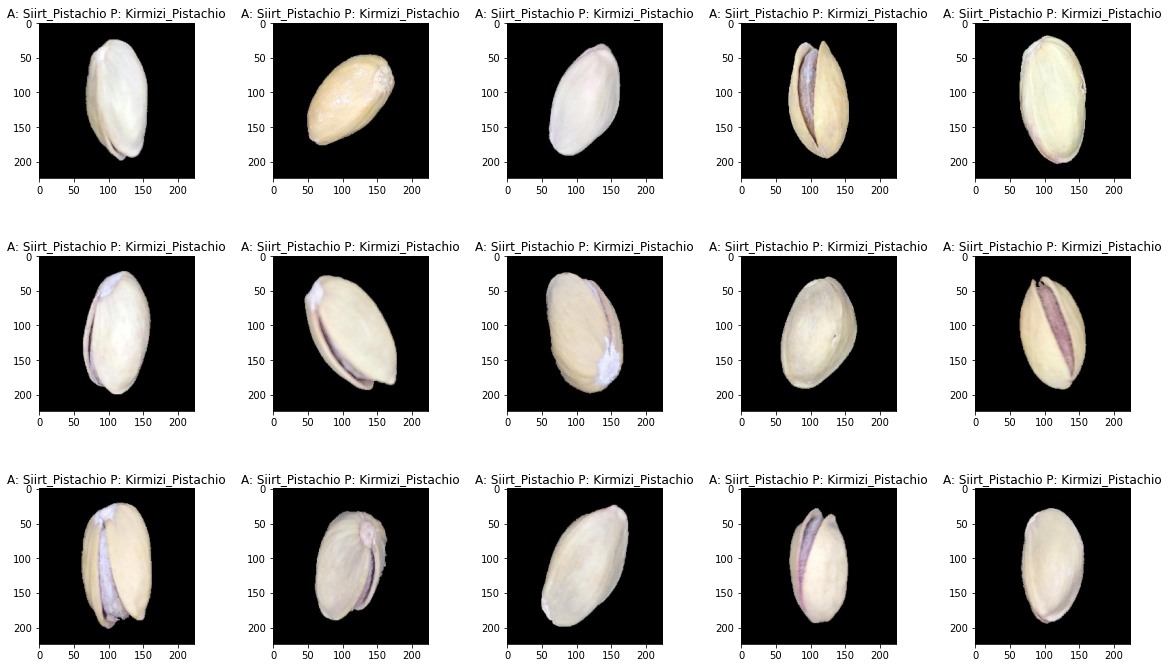

In [50]:
display_images(val_df[val_df['Same']!=True])

In [51]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

<h1  id="13" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:450%;
           font-family:Verdana;
           letter-spacing:0.5px">  Confusion Matrix </h1>

In [52]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[124   0]
 [ 93   0]]


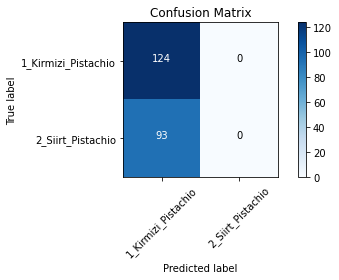

In [53]:
cm_plot_labels = ['1_Kirmizi_Pistachio', '2_Siirt_Pistachio']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

<span style="font-family:cursive; font-size:25px;"> What's Next </span>

<span style="font-family:cursive; font-size:25px;">  Mulim Image Classification and ResNet50 From Scratch  </span>
[Kaggle Link](https://www.kaggle.com/code/abdulbasitniazi/resnet50fromscratch-eda)

<span style="font-family:cursive; font-size:25px;"> Basic CNN of Dog vs Cat </span>
[ Kaggle link](https://www.kaggle.com/code/abdulbasitniazi/vs-cnn-eda)

<span style="font-family:cursive; font-size:25px;"> Making Note Book  Beautiful </span>

[ KaggleLink](https://www.kaggle.com/code/abdulbasitniazi/making-notebook-beautiful)

<span style="font-family:cursive; font-size:25px;"> Transfer Learning Brain Tumor Classsification</span>
[ Kaggle link](https://www.kaggle.com/code/abdulbasitniazi/resnet50-eda-cmatrix)

<span style="font-family:cursive; font-size:25px;"> Watch out in Vedio Explaanation </span>
[ You Tube link](https://www.youtube.com/channel/UCSAw-QDHdXjrAMpg7-TELVA)

<span style="font-family:cursive; font-size:25px;"> If you like Please Vote up All of them </span>